In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from xgboost import XGBRFClassifier, XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
#loading and displaying the data
league_df=pd.read_csv('../input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
display(league_df.head, league_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

<bound method NDFrame.head of           gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1      

None

In [3]:
#setting max number of cols displayed to 40
pd.set_option('display.max_columns',40)
league_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
#dropping game id
league_df.drop('gameId', axis=1, inplace=True)
league_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
#copying league df to a new df with no removed features
df_feat=league_df.copy()

In [6]:
#a new df that contains only target variable and controllable parts 
df_league= league_df[['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills','blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills','redDeaths', 'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_league.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,195,36,15,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,174,43,12,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,186,46,15,3,1,11,7,14,0,0,0,203,28
3,0,43,1,0,4,5,5,0,1,0,201,55,15,2,1,5,4,10,0,0,0,235,47
4,0,75,4,0,6,6,6,0,0,0,210,57,17,2,1,6,6,7,1,0,0,225,67


In [7]:
#Function created to visualize correlation and data distribution and outliers
def corr_heatmap(league_df,digits=3, cmap='coolwarm'):
    """
    created a correlation heatmap to easily visualize multicollinerity that
    might be present in the df

    Args:
        Dataframe: df with features to check multicollinearity on
        digits(int): number of decimal places to display
        cmap(str):Colormap to display correlation range
    Returns:
        fig: Matplotlib Figure
        ax: Matplotlib Axis
    """
    #create correlation matrix from df
    cor= league_df.corr().round(digits)
    cor
    #create mask for upper triangle of matrix
    mask= np.zeros_like(cor)
    mask[np.triu_indices_from(mask)]=True

    #create heatmap correlation matrix 
    fig, ax =plt.subplots(figsize=((len(league_df.columns)),(len(league_df.columns))))
    sns.heatmap(cor,annot=True, ax=ax, cmap=cmap, vmin=-1,vmax=1,mask=mask);
    return fig, ax
def visual_eda(league_df, target, col):
    """
    plots a hist+KDE, boxplot, and scatter plot with linear reg
    line of the specified col. Use to visualize shape of data, outliers,
    and check col's corr with target var.
    Args:
        Dataframe: Dataframe containing col to plot
        target(str): Name of target var
        col(str):Name of the col to plot
    Returns:
        fig: Matplotlib  Fig
        gs: Matplotlib grid spec
    """
    #create copy variables of league_df and col
    data=league_df[col].copy()
    name=col
    
    #Calculate mean and median
    median=round(data.median(),2)
    mean=round(data.mean(),2)
    
    #Create gridspec for plots
    fig= plt.figure(figsize=(11,6))
    gs=GridSpec(nrows=2, ncols=2)
    
    ax0= fig.add_subplot(gs[0,0])
    ax1= fig.add_subplot(gs[1,0])
    ax2= fig.add_subplot(gs[:,1])
    
    #Plot distribution
    sns.histplot(data,alpha=0.5, stat='density',ax=ax0)
    sns.kdeplot(data, color='green',label='KDE', ax=ax0)
    ax0.set(ylabel='Density', title=name)
    ax0.set_title(F"Distribution of {name}")
    ax0.axvline(median,label=f'median={median:,}', color='black')
    ax0.axvline(mean,label=f'mean={mean:,}', color='black', ls=':')
    ax0.legend()
    
   #Plot Boxplot 
    sns.boxplot(data,x=col,ax=ax1)
    ax1.set_title(F"Scatter Plot of {name}")

   #plot scatterplot to illustrate linearity
    sns.regplot(data=league_df, x=col, y=target, line_kws={'color':'red'}, ax=ax2)
    ax2.set_title(F"Scatter Plot of {name}")
    
   #tweak layout and display
    fig.tight_layout();
    return fig, gs



(<Figure size 2808x2808 with 2 Axes>, <AxesSubplot:>)

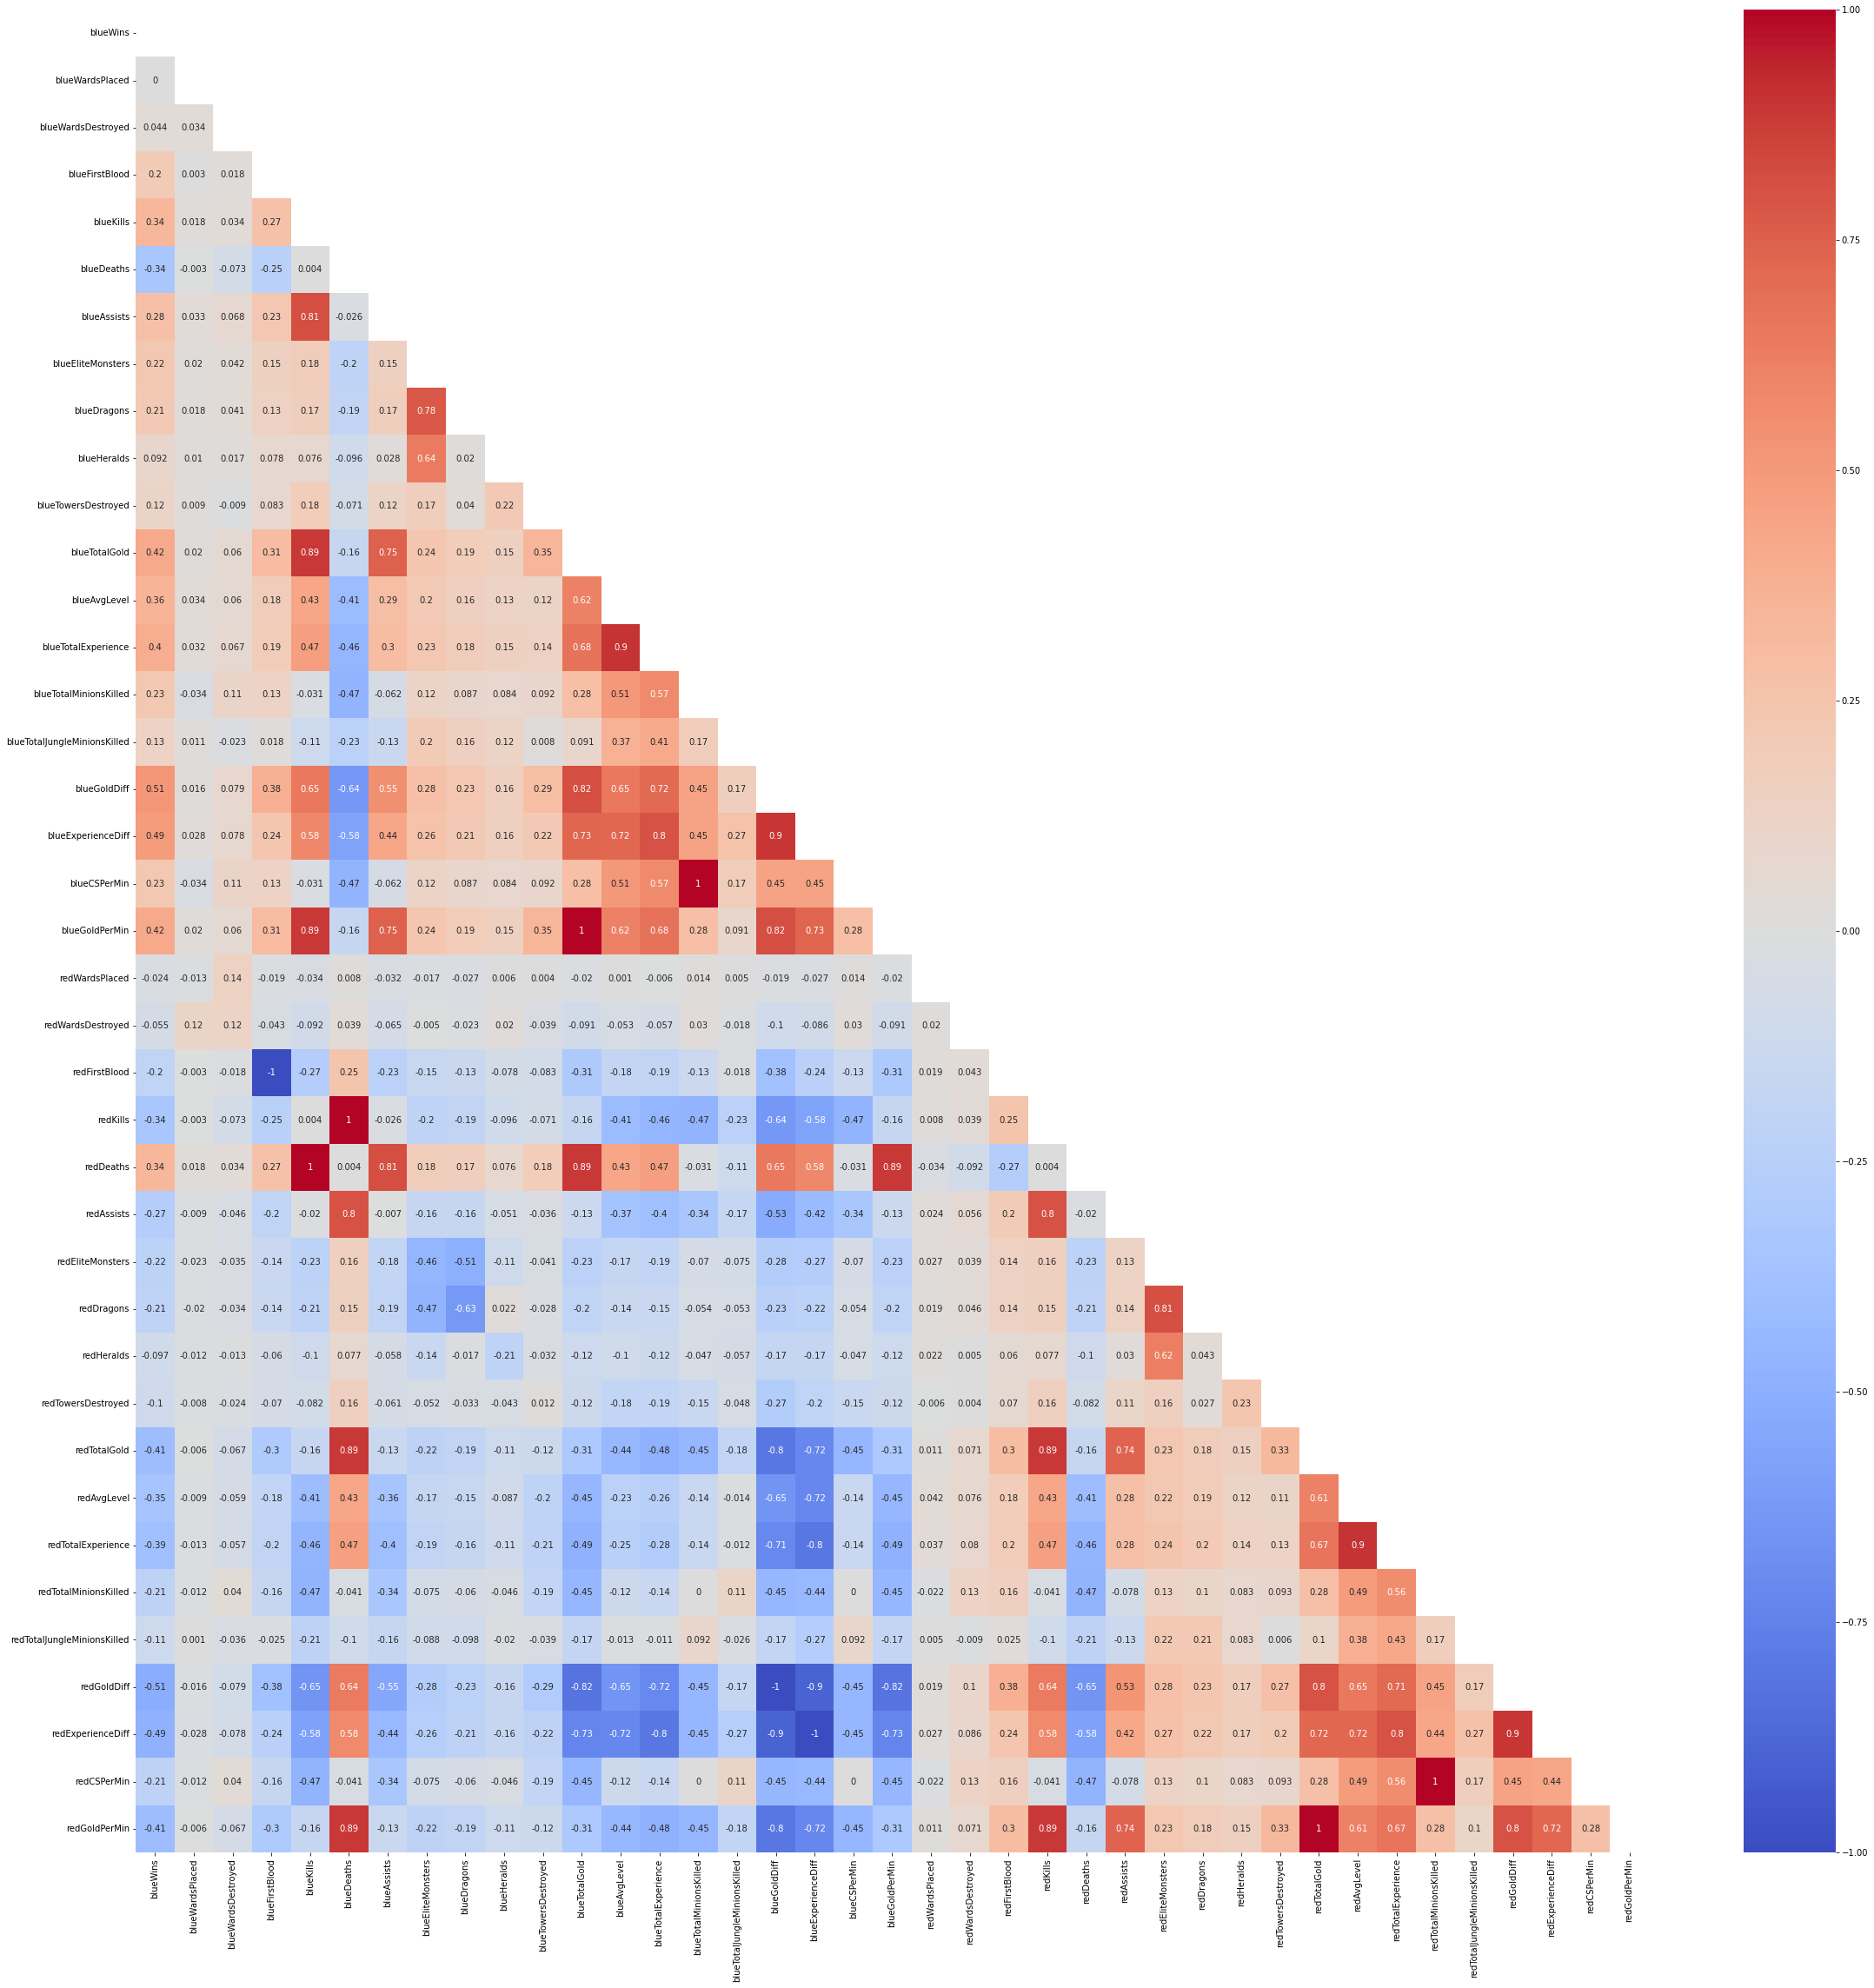

In [8]:
#Create corr heatmap for df_feat
corr_heatmap(df_feat)

(<Figure size 1656x1656 with 2 Axes>, <AxesSubplot:>)

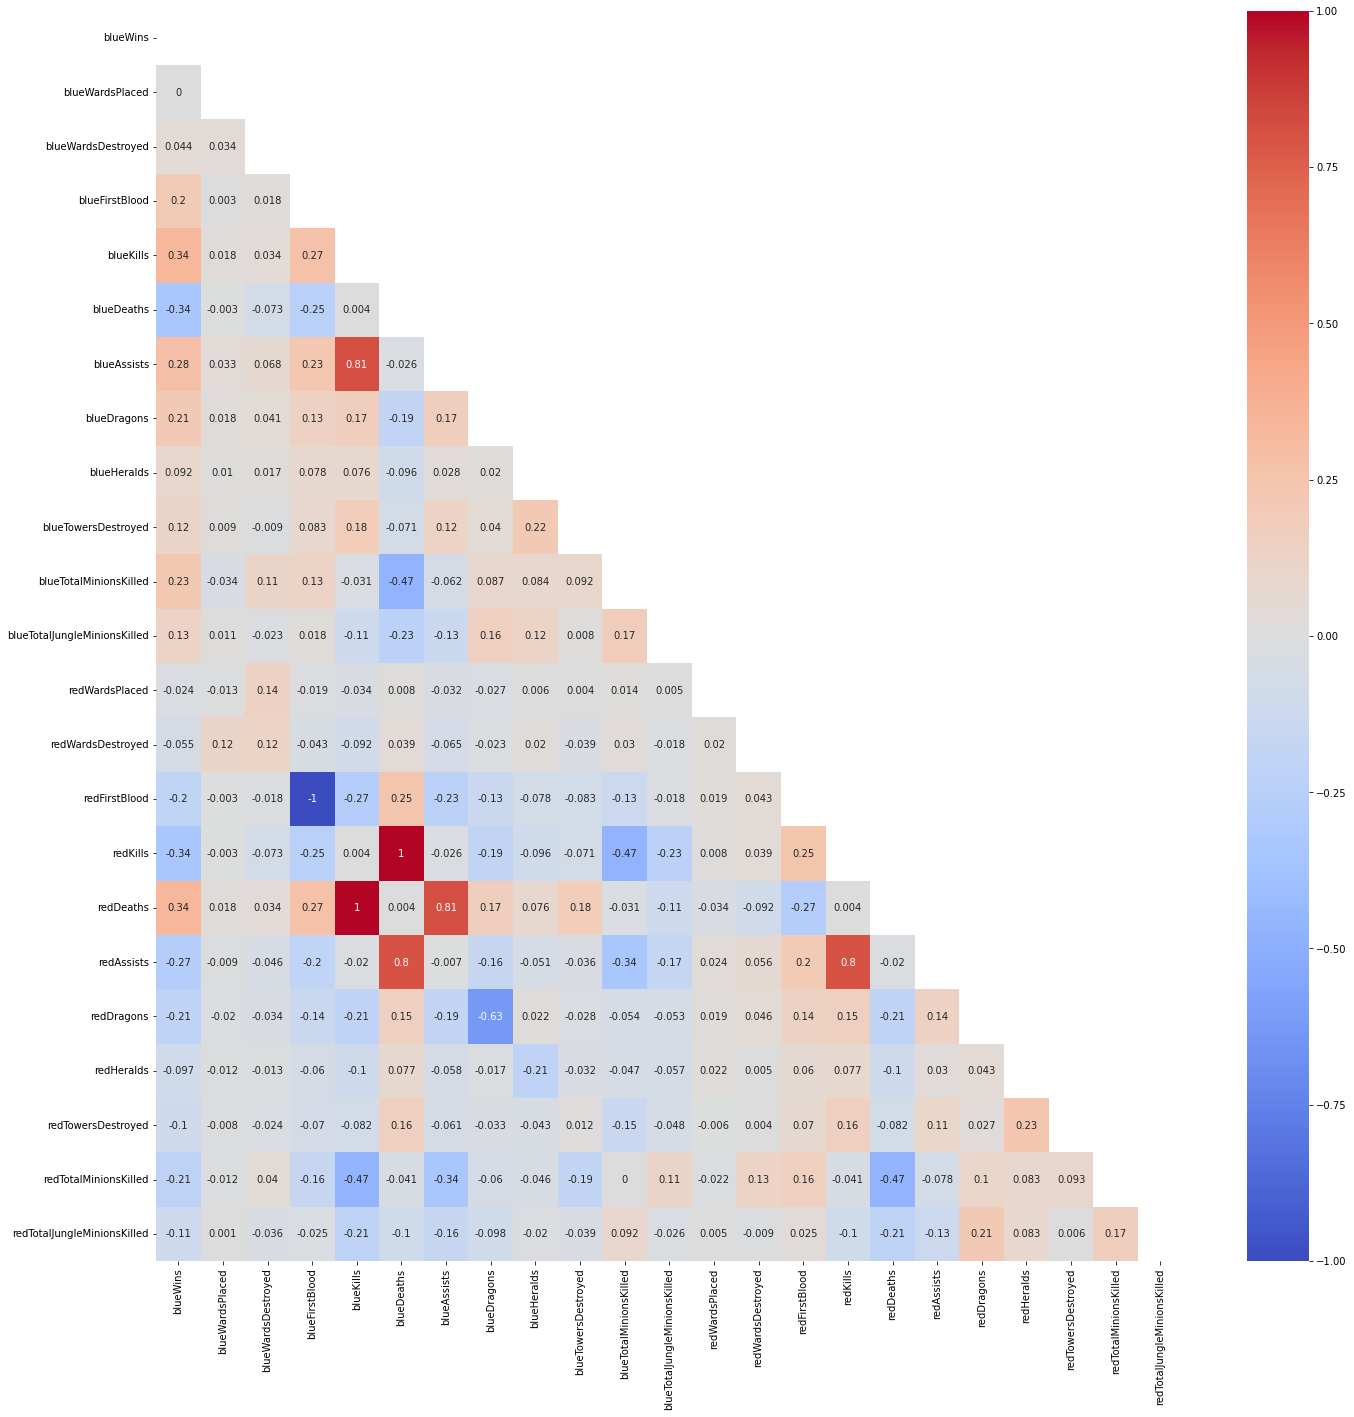

In [9]:
#create corr heatmap for df_league
corr_heatmap(df_league)

In [10]:
#now we drop highly cols with high multicollinearity
df_league.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], inplace=True)
df_league.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

(<Figure size 1440x1440 with 2 Axes>, <AxesSubplot:>)

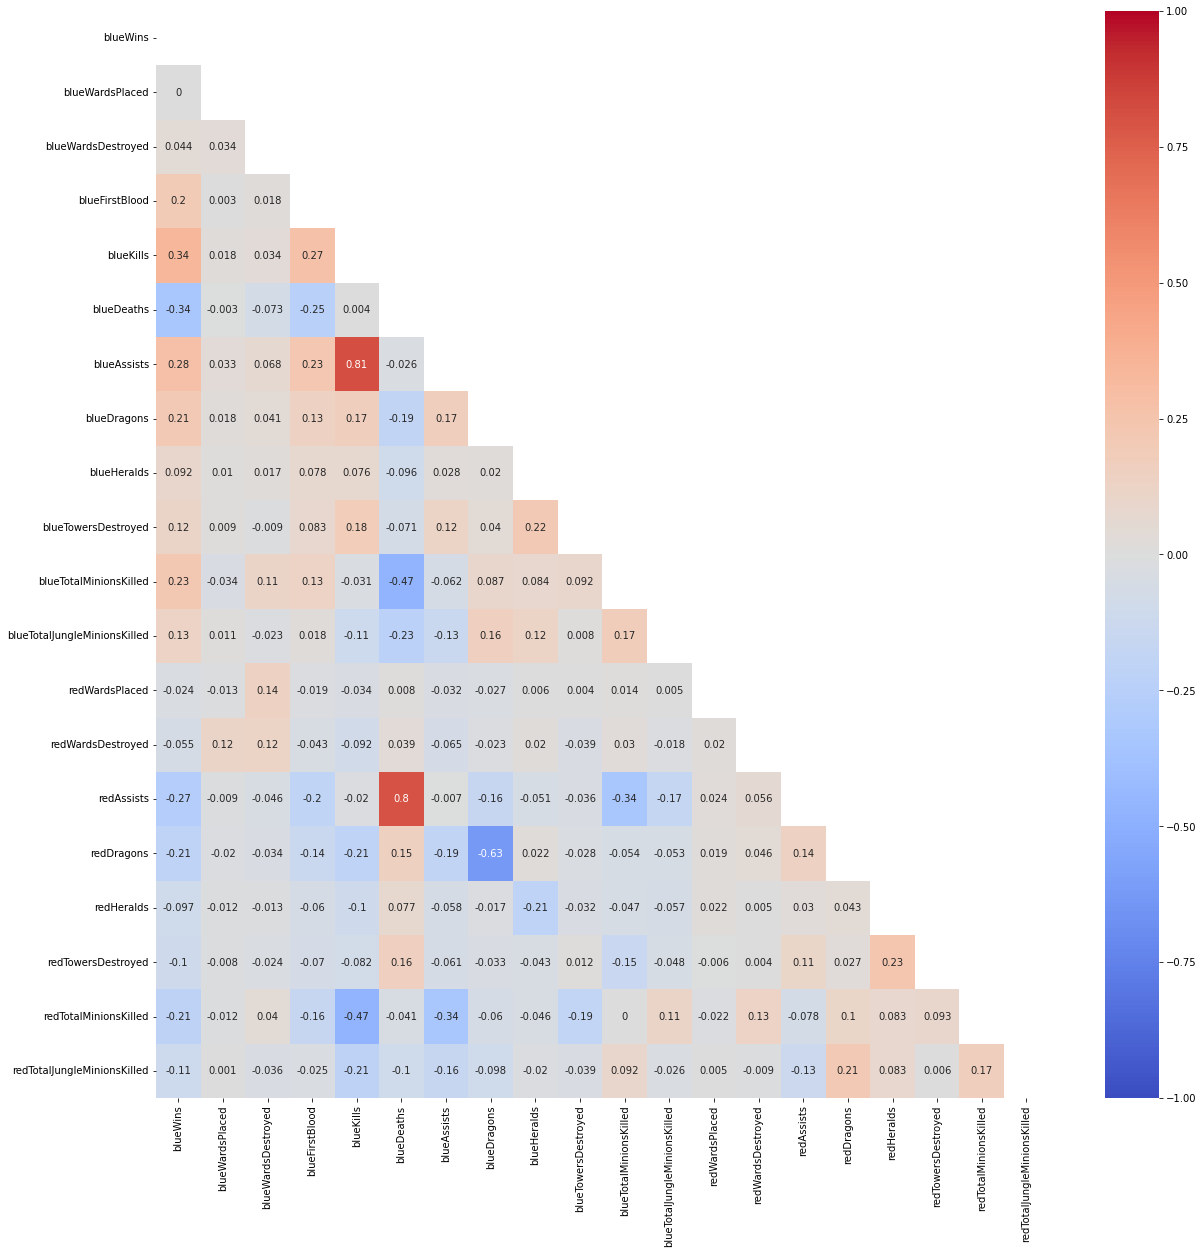

In [11]:
#create corr heatmap to verify that we no longer have multicollinearity
corr_heatmap(df_league)

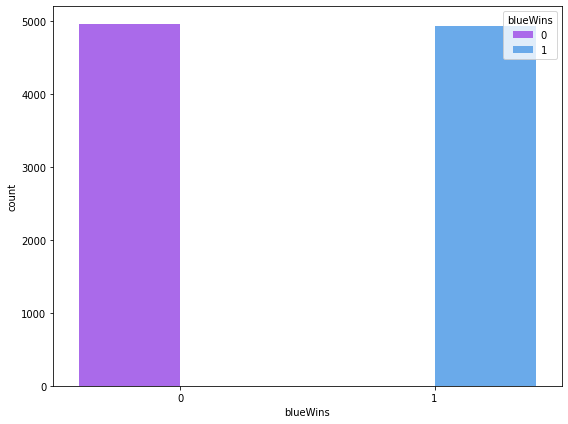

In [12]:
#plot hist
fig, ax= plt.subplots(figsize=(8,6))
#sns.histplot(x='blueWins', data=diff_df, hue='blueWins', palette='Set1', bins=(2), kde=False)
sns.countplot(x='blueWins', data=df_league, hue='blueWins', palette='cool_r')

#save as image
plt.tight_layout()

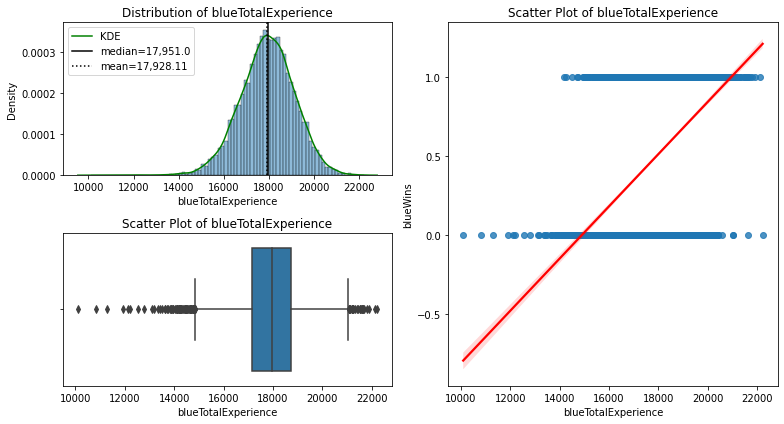

In [13]:
#plot visualization for blueTotalExperience vs blueWins
visual_eda(df_feat, 'blueWins', 'blueTotalExperience');

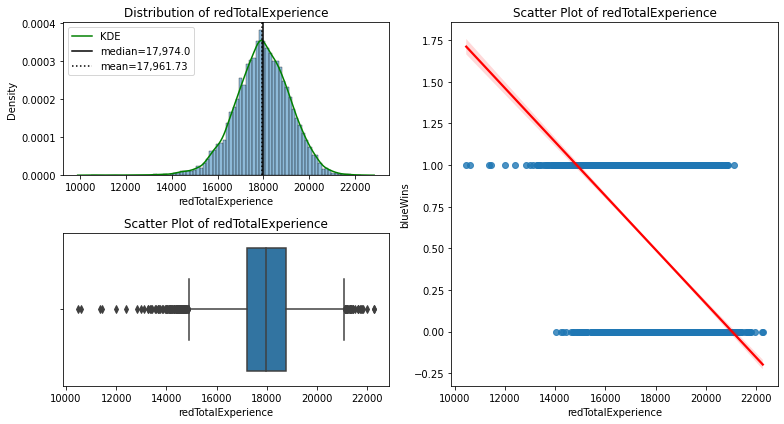

In [14]:
#plot visualization for redTotalExperience vs blueWins
visual_eda(df_feat, 'blueWins', 'redTotalExperience');

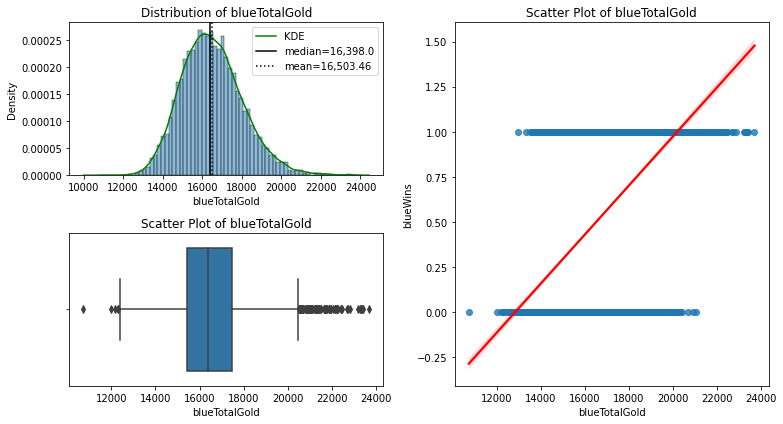

In [15]:
#plot visualization for blueTotalgold vs blueWins
visual_eda(df_feat, 'blueWins', 'blueTotalGold');

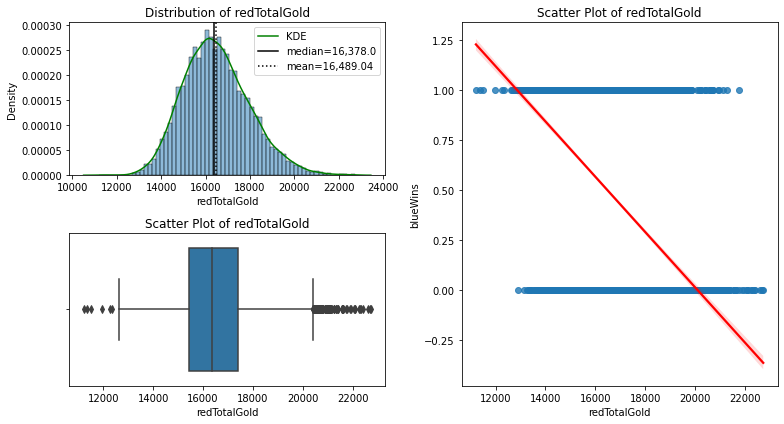

In [16]:
#plot visualization for blueTotalgold vs blueWins
visual_eda(df_feat, 'blueWins', 'redTotalGold');

In [17]:
#create func to facilitate scaling, fitting and eval multiple df

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    """
    Displays evaluation metrics including classification report, confusion matrix
    , ROC-AUC curve
    if the argument 'params' is passed, will display a table of the parameters hyperparameters 
    used in the model.
    args:
        dataframe: df with features to check multicollinearity on
        model(classifier object): typer of classificatier model to use
        X_train(df):Training data with feature vars
        y_train(Series):Training data with target vars
        X_test(df): Testing data with feature var
        y_test(Series): testing data with target var
        digits(int):colormap to display correlation range. Default is 4
        fisize(int,int): figure dims, default is (10,5)
        params(bool): Prints table of hyperparam used in model
    Returns:
    """
    #get predictions
    y_league_test=model.predict(X_test)
    y_league_train=model.predict(X_train)
    #clasification report/scores
    print("Classification Report-Training Data")
    print(metrics.classification_report(y_train,y_league_train,digits=digits))
    print("Classification Report-Test Data")
    print(metrics.classification_report(y_test,y_league_test,digits=digits))
    print("Confusion Matrix and ROC-AUC Visualization")
    fig, axes =plt.subplots(ncols=2, figsize=figsize)
    
    #confusion matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, normalize='true',cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    #Plot ROC curve
    metrics.plot_roc_curve(model,X_test,y_test, ax=axes[1])
    ax=axes[1]
    ax.legend()
    ax.plot([0,1],[0,1],ls="-")
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params==True:
       print("Model Parameters")
       params= pd.DataFrame(pd.Series(model.get_params()))
       params.columns=['parameters']
       display(params)
def split_scale(league_df, target, scaler=StandardScaler()):
    """
    Create train-test splits and scales training data
    args:
        dataframe: df with features to check multicollinearity on
        target(str): Name of target var
        scaler(scaler object): Scaler to use on features DF. Default is StandarScaler
    Returns:
        X_train(df):Training data with feature vars
        y_train(Series):Training data with target vars
        X_test(df): Testing data with feature var
        y_test(Series): testing data with target var
    """
    #seperate X and y
    target=target
    y=league_df[target]
    X=league_df.drop(target, axis=1)
    
    # Train test split
    X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)
    
    #Get list of col names
    cols= X_train.columns
    
    #Scale cols
    scaler=scaler
    X_train= pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test= pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test
def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    """
    Fits model on training data and displays classification evaluation metrics
    args:
        model(classifier object): Type of classificatier model to use
        X_train(df):Training data with feature vars
        y_train(Series):Training data with target vars
        X_test(df): Testing data with feature var
        y_test(Series): testing data with target var
        digits(int):Colormap to display correlation range. Default is 4
        figsize(int,int): Figure dims, Default is (10,5)
        params(bool): Prints table of hyperparameters used in model
        
    Returns:
        model(classifier object): Model after fitting on training data
       
    """
    model.fit(X_train, y_train)
    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)
    
    return model


In [18]:
#Create training and test data split
X_train_select, X_test_select, y_train_select, y_test_select= split_scale(df_league, 'blueWins')
X_train_feat, X_test_feat, y_train_feat, y_test_feat = split_scale(df_feat, 'blueWins')

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7207    0.7256    0.7231      3713
           1     0.7224    0.7175    0.7200      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7215    0.7215      7409
weighted avg     0.7216    0.7216    0.7215      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7268    0.7298    0.7283      1236
           1     0.7282    0.7253    0.7268      1234

    accuracy                         0.7275      2470
   macro avg     0.7275    0.7275    0.7275      2470
weighted avg     0.7275    0.7275    0.7275      2470

Confusion Matrix and ROC-AUC Visualization


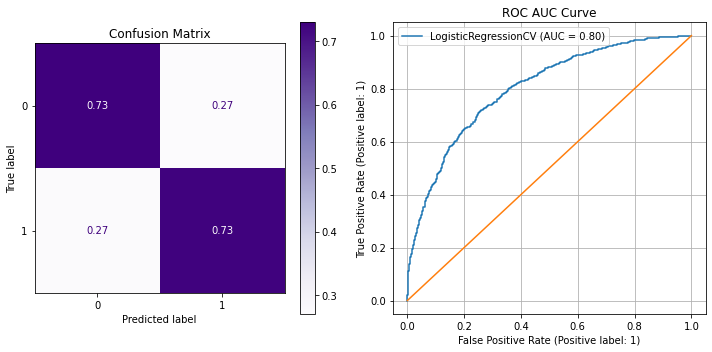

In [19]:
#fit and evaluate df_league on a log reg model
log_select = fit_eval(LogisticRegressionCV(random_state=42), X_train_select, y_train_select, X_test_select, y_test_select)

In [20]:
#create param grid for log red gs and fit to data
log_reg= LogisticRegression(random_state=42)

params= {'C':[0.001,0.01,0.1,1,10,100,1e6,1e12],
        'penalty':['l1','l2','elastic_net'],
        'fit_intercept':[True, False],
        'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
        'class_weight':['balanced']}
log_grid= GridSearchCV(log_reg, params, scoring='recall_macro')
log_grid.fit(X_train_select, y_train_select)
#print best params for log_grid
log_grid.best_params_

{'C': 0.1,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'penalty': 'l2',
 'solver': 'lbfgs'}

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7203    0.7242    0.7223      3713
           1     0.7214    0.7175    0.7195      3696

    accuracy                         0.7209      7409
   macro avg     0.7209    0.7209    0.7209      7409
weighted avg     0.7209    0.7209    0.7209      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7246    0.7257    0.7251      1236
           1     0.7248    0.7237    0.7242      1234

    accuracy                         0.7247      2470
   macro avg     0.7247    0.7247    0.7247      2470
weighted avg     0.7247    0.7247    0.7247      2470

Confusion Matrix and ROC-AUC Visualization


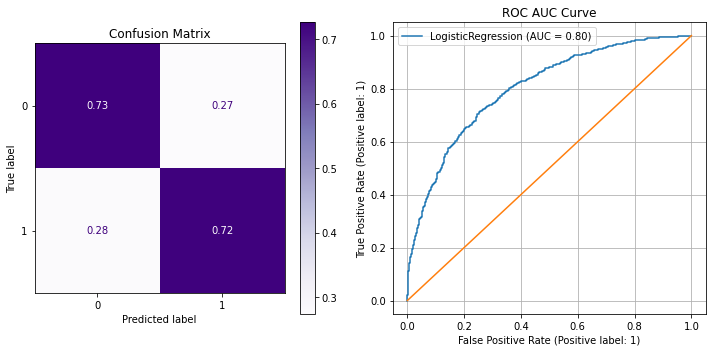

Model Parameters


,parameters
C,0.1
class_weight,balanced
dual,False
fit_intercept,False
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [21]:
#eval best estimating model
evaluate_model(log_grid.best_estimator_, X_train_select, y_train_select,X_test_select, y_test_select, params=True)

In [22]:
#create param grid for log reg gs and fit to data
log_reg_ref= LogisticRegression(random_state=42)

params= {'C':[0.0001,0.001],
        'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
        'class_weight':['balanced']}
log_grid_refined= GridSearchCV(log_reg_ref, params, scoring='recall_macro')
log_grid_refined.fit(X_train_select, y_train_select)
#print best params for log_grid refined
log_grid_refined.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'solver': 'liblinear'}

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7185    0.7199    0.7192      3713
           1     0.7181    0.7167    0.7174      3696

    accuracy                         0.7183      7409
   macro avg     0.7183    0.7183    0.7183      7409
weighted avg     0.7183    0.7183    0.7183      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7166    0.7241    0.7203      1236
           1     0.7207    0.7131    0.7169      1234

    accuracy                         0.7186      2470
   macro avg     0.7186    0.7186    0.7186      2470
weighted avg     0.7186    0.7186    0.7186      2470

Confusion Matrix and ROC-AUC Visualization


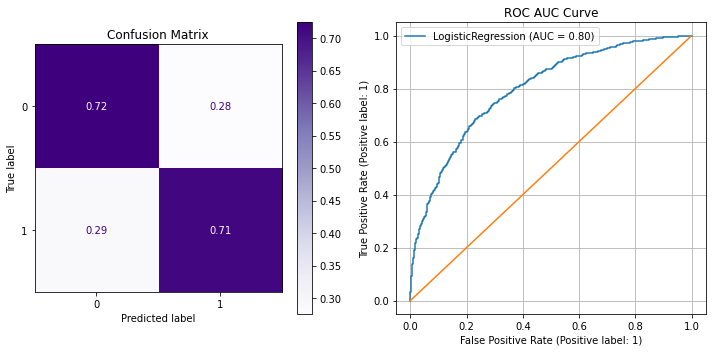

Model Parameters


,parameters
C,0.001
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [23]:
#eval best estimating model
evaluate_model(log_grid_refined.best_estimator_, X_train_select, y_train_select,X_test_select, y_test_select, params=True)

Classification Report-Training Data
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3713
           1     1.0000    1.0000    1.0000      3696

    accuracy                         1.0000      7409
   macro avg     1.0000    1.0000    1.0000      7409
weighted avg     1.0000    1.0000    1.0000      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7158    0.7314    0.7235      1236
           1     0.7249    0.7091    0.7169      1234

    accuracy                         0.7202      2470
   macro avg     0.7203    0.7202    0.7202      2470
weighted avg     0.7203    0.7202    0.7202      2470

Confusion Matrix and ROC-AUC Visualization


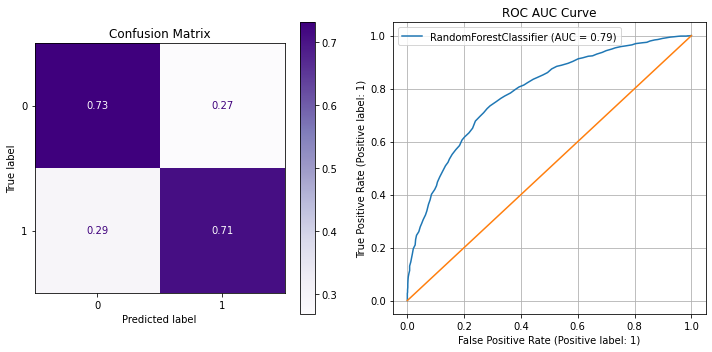

RandomForestClassifier(random_state=42)

In [24]:
#fit and eval random forest on df_league
fit_eval(RandomForestClassifier(random_state=42), X_train_select, y_train_select,X_test_select, y_test_select)

Classification Report-Training Data
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3713
           1     1.0000    1.0000    1.0000      3696

    accuracy                         1.0000      7409
   macro avg     1.0000    1.0000    1.0000      7409
weighted avg     1.0000    1.0000    1.0000      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7173    0.7371    0.7271      1236
           1     0.7292    0.7091    0.7190      1234

    accuracy                         0.7231      2470
   macro avg     0.7232    0.7231    0.7230      2470
weighted avg     0.7232    0.7231    0.7230      2470

Confusion Matrix and ROC-AUC Visualization


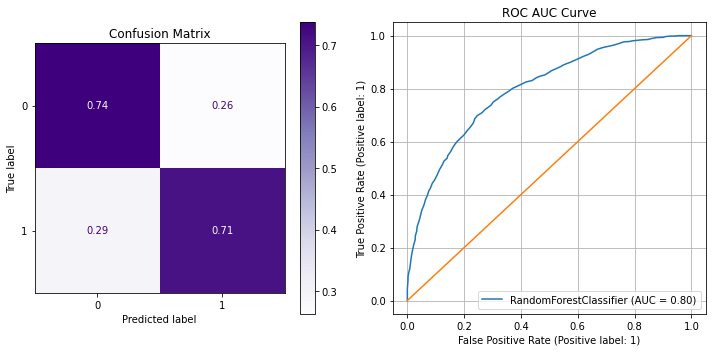

RandomForestClassifier(random_state=42)

In [25]:
#fit and eval random forest on df_feat
fit_eval(RandomForestClassifier(random_state=42), X_train_feat, y_train_feat,X_test_feat, y_test_feat)

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7479    0.7272    0.7374      3713
           1     0.7334    0.7538    0.7434      3696

    accuracy                         0.7405      7409
   macro avg     0.7406    0.7405    0.7404      7409
weighted avg     0.7407    0.7405    0.7404      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7119    0.6998    0.7058      1236
           1     0.7044    0.7164    0.7103      1234

    accuracy                         0.7081      2470
   macro avg     0.7082    0.7081    0.7081      2470
weighted avg     0.7082    0.7081    0.7081      2470

Confusion Matrix and ROC-AUC Visualization


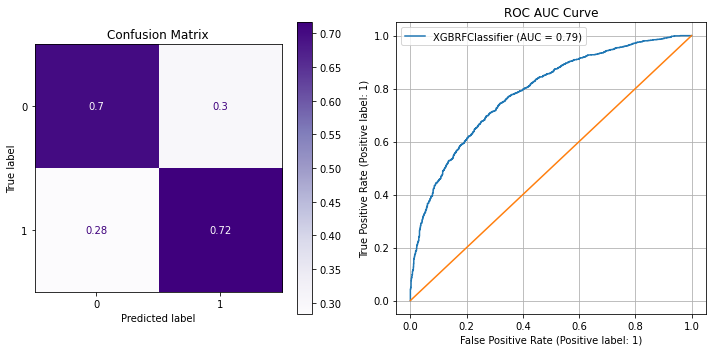

In [26]:
#fit and eval xgboost on df_select
xgb_league=fit_eval(XGBRFClassifier(random_state=42,eval_metric='mlogloss'), X_train_select, y_train_select,X_test_select, y_test_select)

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7573    0.7649    0.7611      3713
           1     0.7614    0.7538    0.7576      3696

    accuracy                         0.7593      7409
   macro avg     0.7594    0.7593    0.7593      7409
weighted avg     0.7594    0.7593    0.7593      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7078    0.7290    0.7182      1236
           1     0.7201    0.6985    0.7092      1234

    accuracy                         0.7138      2470
   macro avg     0.7140    0.7138    0.7137      2470
weighted avg     0.7140    0.7138    0.7137      2470

Confusion Matrix and ROC-AUC Visualization


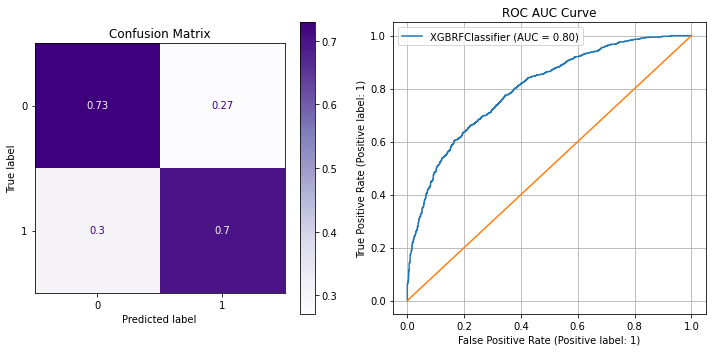

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False,
                eval_metric='mlogloss', gamma=0, gpu_id=-1,
                importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=42, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [27]:
#fit and eval xgboost on df_feat
fit_eval(XGBRFClassifier(random_state=42,eval_metric='mlogloss'), X_train_feat, y_train_feat,X_test_feat, y_test_feat)

In [28]:
#Create param grid for XGBoost random forest gs and fit to data
xgb_rf=XGBRFClassifier(random_state=42,eval_metric='mlogloss')

params= {'learning_rate': [0.03,0.05,0.06],
        'max_depth':[4,5,6],
        'min_child_weight':[2,3,4],
        'subsample':[0.3,0.4,0.5],
        'n_estimators':[100]}
xgb_grid= GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None,
                                       enable_categorical=False,
                                       eval_metric='mlogloss', gamma=None,
                                       gpu_id=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=42,
                                

In [29]:
#print best params for xgb_grid
xgb_grid.best_params_

{'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.3}

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7444    0.7388    0.7416      3713
           1     0.7395    0.7451    0.7423      3696

    accuracy                         0.7419      7409
   macro avg     0.7419    0.7419    0.7419      7409
weighted avg     0.7420    0.7419    0.7419      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7193    0.7152    0.7172      1236
           1     0.7164    0.7204    0.7184      1234

    accuracy                         0.7178      2470
   macro avg     0.7178    0.7178    0.7178      2470
weighted avg     0.7178    0.7178    0.7178      2470

Confusion Matrix and ROC-AUC Visualization


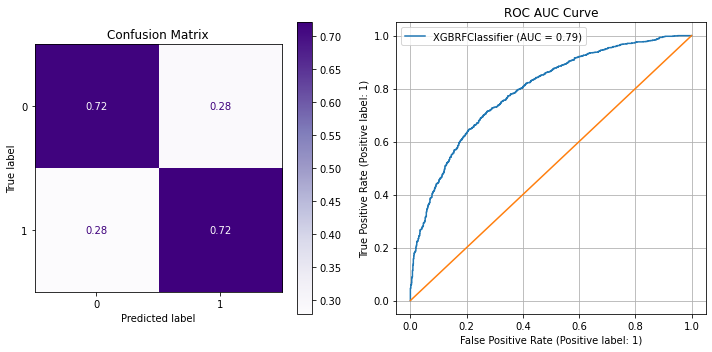

Model Parameters


,parameters
colsample_bynode,0.8
learning_rate,0.03
reg_lambda,0.00001
subsample,0.3
use_label_encoder,True
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bytree,1


In [30]:
#eval best estimating model
evaluate_model(xgb_grid.best_estimator_, X_train_select, y_train_select, X_test_select,y_test_select, params=True)

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7444    0.7388    0.7416      3713
           1     0.7395    0.7451    0.7423      3696

    accuracy                         0.7419      7409
   macro avg     0.7419    0.7419    0.7419      7409
weighted avg     0.7420    0.7419    0.7419      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7193    0.7152    0.7172      1236
           1     0.7164    0.7204    0.7184      1234

    accuracy                         0.7178      2470
   macro avg     0.7178    0.7178    0.7178      2470
weighted avg     0.7178    0.7178    0.7178      2470

Confusion Matrix and ROC-AUC Visualization


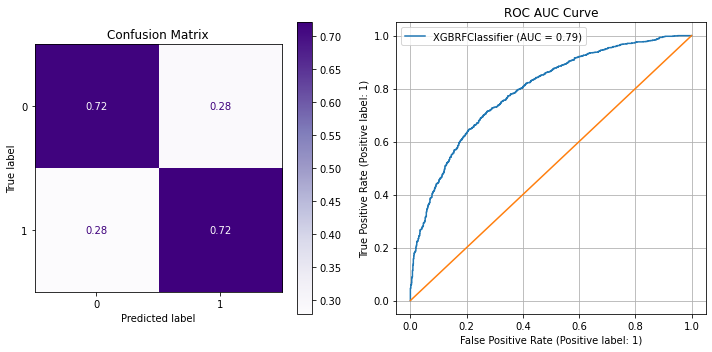

Model Parameters


,parameters
colsample_bynode,0.8
learning_rate,0.03
reg_lambda,0.00001
subsample,0.3
use_label_encoder,True
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bytree,1


In [31]:
#eval best estimating model
evaluate_model(xgb_grid.best_estimator_, X_train_select, y_train_select, X_test_select, y_test_select, params=True)

In [32]:
#Create param grid for XGBoost random forest gs and fit to data
xgb_rf_ref=XGBRFClassifier(random_state=42,eval_metric='mlogloss')

params= {'learning_rate': [0.0001,0.001],
        'max_depth':[6,7,8],
        'min_child_weight':[2,3,4],
        'subsample':[0.3,0.5,0.7],
        'n_estimators':[100]}
xgb_grid_refined= GridSearchCV(xgb_rf, params, scoring='recall_macro')
xgb_grid_refined.fit(X_train_select, y_train_select)

GridSearchCV(estimator=XGBRFClassifier(base_score=None, booster=None,
                                       colsample_bylevel=None,
                                       colsample_bytree=None,
                                       enable_categorical=False,
                                       eval_metric='mlogloss', gamma=None,
                                       gpu_id=None, importance_type=None,
                                       interaction_constraints=None,
                                       max_delta_step=None, max_depth=None,
                                       min_child_weight=None, missing=nan,
                                       monotone_constraints=None,
                                       n_estimators=100, n_jobs=None,
                                       num_parallel_tree=None,
                                       objective='binary:logistic',
                                       predictor=None, random_state=42,
                                

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7207    0.7256    0.7231      3713
           1     0.7224    0.7175    0.7200      3696

    accuracy                         0.7216      7409
   macro avg     0.7216    0.7215    0.7215      7409
weighted avg     0.7216    0.7216    0.7215      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7268    0.7298    0.7283      1236
           1     0.7282    0.7253    0.7268      1234

    accuracy                         0.7275      2470
   macro avg     0.7275    0.7275    0.7275      2470
weighted avg     0.7275    0.7275    0.7275      2470

Confusion Matrix and ROC-AUC Visualization


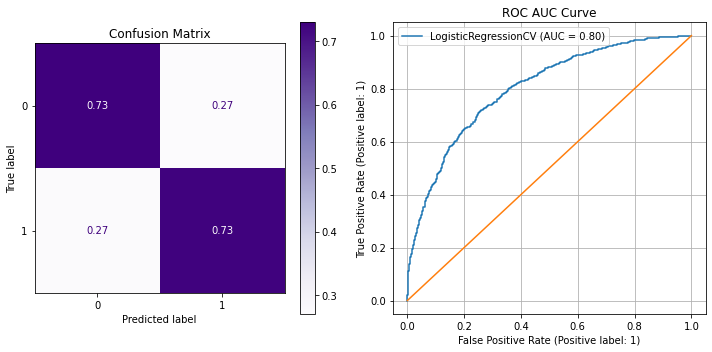

Model Parameters


,parameters
Cs,10
class_weight,None
cv,None
dual,False
fit_intercept,True
intercept_scaling,1.0
l1_ratios,None
max_iter,100
multi_class,auto
n_jobs,None


In [33]:
#eval best estimating log reg model
evaluate_model(log_select, X_train_select, y_train_select, X_test_select, y_test_select, params=True)

Classification Report-Training Data
              precision    recall  f1-score   support

           0     0.7444    0.7388    0.7416      3713
           1     0.7395    0.7451    0.7423      3696

    accuracy                         0.7419      7409
   macro avg     0.7419    0.7419    0.7419      7409
weighted avg     0.7420    0.7419    0.7419      7409

Classification Report-Test Data
              precision    recall  f1-score   support

           0     0.7193    0.7152    0.7172      1236
           1     0.7164    0.7204    0.7184      1234

    accuracy                         0.7178      2470
   macro avg     0.7178    0.7178    0.7178      2470
weighted avg     0.7178    0.7178    0.7178      2470

Confusion Matrix and ROC-AUC Visualization


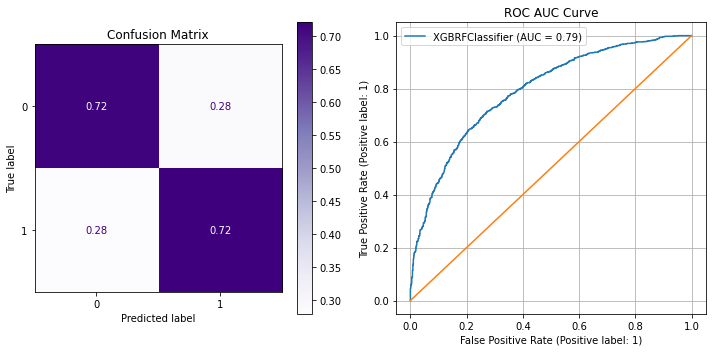

Model Parameters


,parameters
colsample_bynode,0.8
learning_rate,0.001
reg_lambda,0.00001
subsample,0.3
use_label_encoder,True
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bytree,1


In [34]:
#eval best estimating XGBoost model
evaluate_model(xgb_grid_refined.best_estimator_, X_train_select, y_train_select, X_test_select, y_test_select, params=True)

In [35]:
#extract coeffs from log_grid.best_estimator_ model
log_coeff = pd.Series(log_select.coef_.flatten(), index=X_train_select.columns).sort_values(ascending=False)
log_coeff

blueKills                       0.728298
blueTotalJungleMinionsKilled    0.247880
blueTotalMinionsKilled          0.232926
blueTowersDestroyed             0.119629
blueDragons                     0.099816
blueHeralds                     0.053624
blueFirstBlood                  0.046913
blueAssists                     0.035660
blueWardsDestroyed              0.026762
blueWardsPlaced                -0.006887
redWardsDestroyed              -0.027312
redAssists                     -0.041991
redHeralds                     -0.042458
redTowersDestroyed             -0.044702
redWardsPlaced                 -0.069512
redDragons                     -0.102748
redTotalJungleMinionsKilled    -0.146236
redTotalMinionsKilled          -0.218261
blueDeaths                     -0.693537
dtype: float64

In [36]:
#convert log coeffs to odds and subtract 1 to display change in odds
log_odds= np.exp(log_coeff)-1
log_odds

blueKills                       1.071553
blueTotalJungleMinionsKilled    0.281306
blueTotalMinionsKilled          0.262288
blueTowersDestroyed             0.127079
blueDragons                     0.104967
blueHeralds                     0.055087
blueFirstBlood                  0.048031
blueAssists                     0.036303
blueWardsDestroyed              0.027124
blueWardsPlaced                -0.006864
redWardsDestroyed              -0.026942
redAssists                     -0.041122
redHeralds                     -0.041569
redTowersDestroyed             -0.043718
redWardsPlaced                 -0.067151
redDragons                     -0.097646
redTotalJungleMinionsKilled    -0.136046
redTotalMinionsKilled          -0.196084
blueDeaths                     -0.500195
dtype: float64

In [37]:
#change name of cols
renamed_cols= {'blueKills':'Kills',
              'blueTotalJungleMinionsKilled':'Total Jungle Minions Killed',
              'blueTotalMinionsKilled':'Total Minions Killed',
              'blueTowerDestroyed': 'Tower Destroyed',
              'blueDragons':'Dragons Killed',
              'blueHeralds': 'Heralds Killed',
              'blueFirstBlood':'First Blood',
              'blueAssists':'Assists',
              'blueWardsDestroyed':'Wards Destroyed',
              'blueWardsPlaced':'Wards placed',
              'redTotalJungleMinionsKilled':'Enemy Total Jungle Minions Killed',
              'redTotalMinionsKilled':'Enemy Total Minions Killed',
              'redTowerDestroyed': 'Enemy Tower Destroyed',
              'redDragons':'Enemy Dragons Killed',
              'redHeralds': 'Enemy Heralds Killed',
              'redAssists':'Enemy Assists',
              'redWardsDestroyed':'Enemy Wards Destroyed',
              'redWardsPlaced':'Enemy Wards placed',
              'blueDeaths': 'Enemy kills'}
log_odds.rename(renamed_cols, inplace=True)
log_odds

Kills                                1.071553
Total Jungle Minions Killed          0.281306
Total Minions Killed                 0.262288
blueTowersDestroyed                  0.127079
Dragons Killed                       0.104967
Heralds Killed                       0.055087
First Blood                          0.048031
Assists                              0.036303
Wards Destroyed                      0.027124
Wards placed                        -0.006864
Enemy Wards Destroyed               -0.026942
Enemy Assists                       -0.041122
Enemy Heralds Killed                -0.041569
redTowersDestroyed                  -0.043718
Enemy Wards placed                  -0.067151
Enemy Dragons Killed                -0.097646
Enemy Total Jungle Minions Killed   -0.136046
Enemy Total Minions Killed          -0.196084
Enemy kills                         -0.500195
dtype: float64

In [38]:
#set theme and style for plots
sns.set_theme('talk')
sns.set_style('darkgrid')

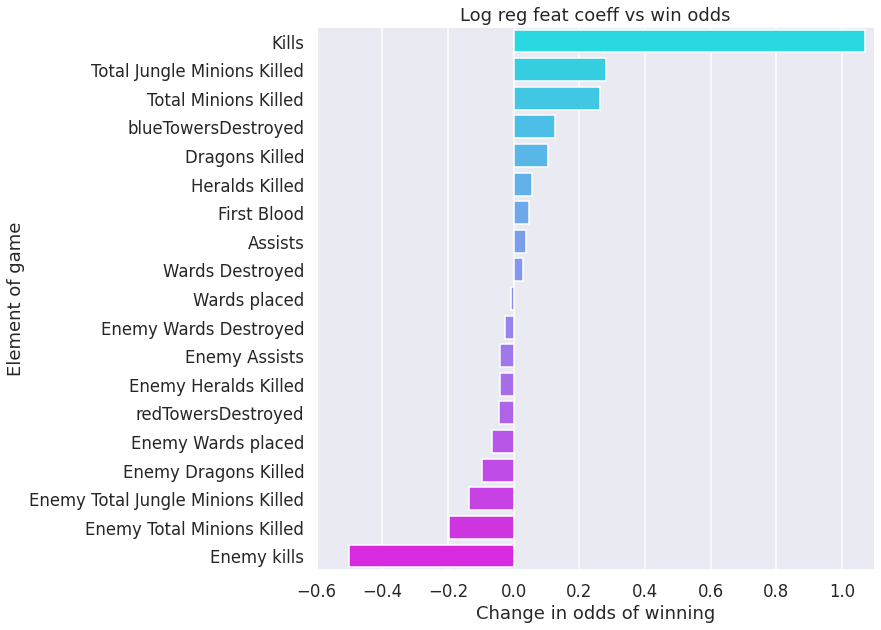

In [39]:
#create bar plot of feat coeff as odds
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=log_odds.values, y=log_odds.index, palette='cool', ax=ax, orient='h')
ax.set_title('Log reg feat coeff vs win odds')
ax.set_xlabel('Change in odds of winning')
ax.set_ylabel('Element of game')
ax.set_xlim([-.6,1.1]);
#ax.set_xticks([-.15,.15])
#ax.set_xtickslabels(['Decrease in odds','Increase in odds'])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [40]:
#extract coeff from log_grid.best_estimator_ model
xgb_importance= pd.Series(xgb_grid_refined.best_estimator_.feature_importances_, index=X_train_select.columns).sort_values(ascending=False)
xgb_importance

blueDeaths                      0.216094
blueKills                       0.199101
redAssists                      0.055632
blueAssists                     0.054480
redDragons                      0.050763
blueDragons                     0.046283
redTotalMinionsKilled           0.040424
blueTotalJungleMinionsKilled    0.038758
blueTotalMinionsKilled          0.038099
blueHeralds                     0.034737
blueTowersDestroyed             0.033503
redTotalJungleMinionsKilled     0.032168
blueFirstBlood                  0.031084
redWardsDestroyed               0.026748
redHeralds                      0.026373
redWardsPlaced                  0.025291
blueWardsDestroyed              0.025039
blueWardsPlaced                 0.022795
redTowersDestroyed              0.002627
dtype: float32

In [41]:
#change name of cols
xgb_importance.rename(renamed_cols, inplace=True)
xgb_importance

Enemy kills                          0.216094
Kills                                0.199101
Enemy Assists                        0.055632
Assists                              0.054480
Enemy Dragons Killed                 0.050763
Dragons Killed                       0.046283
Enemy Total Minions Killed           0.040424
Total Jungle Minions Killed          0.038758
Total Minions Killed                 0.038099
Heralds Killed                       0.034737
blueTowersDestroyed                  0.033503
Enemy Total Jungle Minions Killed    0.032168
First Blood                          0.031084
Enemy Wards Destroyed                0.026748
Enemy Heralds Killed                 0.026373
Enemy Wards placed                   0.025291
Wards Destroyed                      0.025039
Wards placed                         0.022795
redTowersDestroyed                   0.002627
dtype: float32

Text(0, 0.5, 'Element of game')

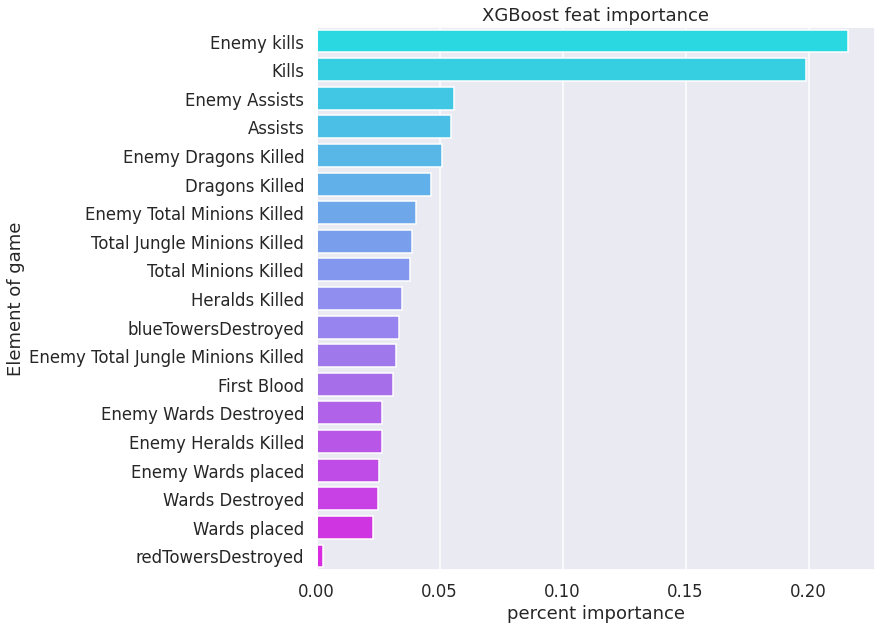

In [42]:
#create bar plot of feat importance
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette='cool', ax=ax, orient='h')
ax.set_title('XGBoost feat importance')
ax.set_xlabel('percent importance')
ax.set_ylabel('Element of game')


In [43]:
#create series that display the mean total minions killed for matches that resulted in losses and wins
df_viz=league_df.copy()
df_minions=df_viz.groupby('blueWins').agg('mean')['blueTotalMinionsKilled']
df_minions

blueWins
0    211.793090
1    221.624949
Name: blueTotalMinionsKilled, dtype: float64

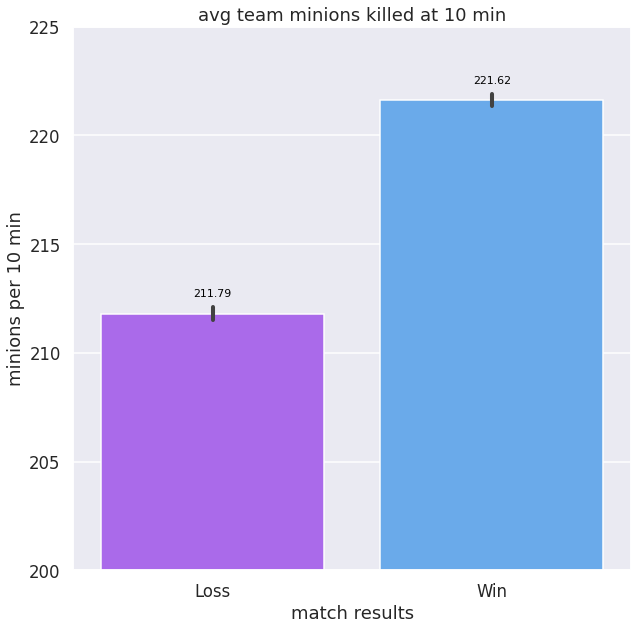

In [44]:
#create bar plot of mean number of minions killed for losses and wins
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=df_viz, x='blueWins', y='blueTotalMinionsKilled', palette='cool_r', ax=ax, ci=68)
ax.set_title('avg team minions killed at 10 min')
ax.set_xlabel('match results')
ax.set_ylabel('minions per 10 min')
ax.set_xticklabels(['Loss','Win'])

x_axis= ax.get_xticklabels()
y_axis= [df_minions.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0,20), textcoords='offset points')
ax.set_ylim([200,225]);

In [45]:
#create series that display the mean jg minons killed for matches that resulted in losses and wins
df_jg=df_viz.groupby('blueWins').agg('mean')['blueTotalJungleMinionsKilled']
df_jg

blueWins
0    49.211154
1    51.813185
Name: blueTotalJungleMinionsKilled, dtype: float64

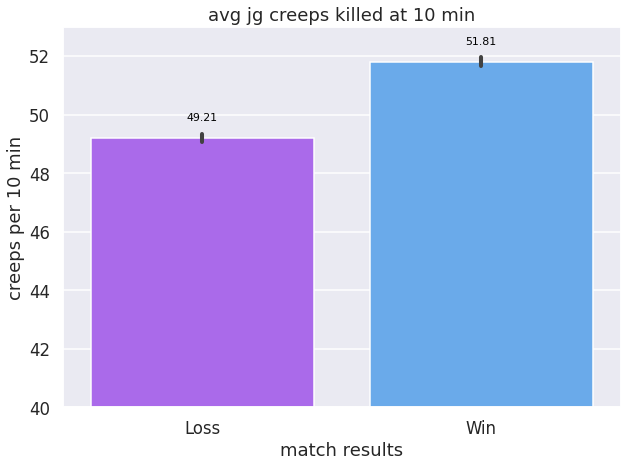

In [46]:
#create bar plot of mean number of jungle minions killed for losses and wins
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df_viz, x='blueWins', y='blueTotalJungleMinionsKilled', palette='cool_r', ax=ax, ci=68)
ax.set_title('avg jg creeps killed at 10 min')
ax.set_xlabel('match results')
ax.set_ylabel('creeps per 10 min')
ax.set_xticklabels(['Loss','Win'])

x_axis= ax.get_xticklabels()
y_axis= [df_jg.values]

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0,20), textcoords='offset points')
ax.set_ylim([40,53]);

In [47]:
#calc percent of games won for each number of kills per game
#calc total matches for each kill count
df_kills=league_df.copy()
df_kills_total= df_kills.groupby('blueKills').count()
df_kills_total= df_kills_total[['blueWins']]
#calc number of won matches for each kill count
df_kills_won= df_kills.groupby('blueKills').sum()
df_kills_percent_won= df_kills_won['blueWins']/df_kills_total['blueWins']
#display percent of wins per kill count
df_kills_percent_won


blueKills
0     0.142857
1     0.191693
2     0.244663
3     0.278081
4     0.407251
5     0.422427
6     0.510590
7     0.556239
8     0.599788
9     0.687587
10    0.707780
11    0.747059
12    0.803922
13    0.897959
14    0.843750
15    0.842105
16    0.966667
17    1.000000
18    1.000000
19    1.000000
22    1.000000
Name: blueWins, dtype: float64

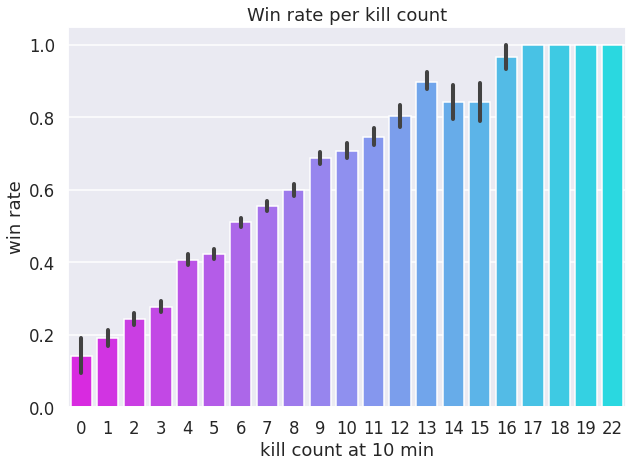

In [48]:
#create bar plot of kills vs win rate
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df_viz, x='blueKills', y='blueWins',palette='cool_r', ax=ax, ci=68)
ax.set_title('Win rate per kill count')
ax.set_xlabel('kill count at 10 min')
ax.set_ylabel('win rate');

In [49]:
#calc percent of games won for each drag kills per game
#calc total matches for drag killed or not
df_drag=league_df.copy()
df_drag_total= df_drag.groupby('blueDragons').count()
df_drag_total= df_drag_total[['blueWins']]
#calc number of won matches for each kill count
df_drag_won= df_drag.groupby('blueDragons').sum()
df_drag_percent_won= df_drag_won['blueWins']/df_drag_total['blueWins']
#display percent of wins per kill count
df_drag_percent_won

blueDragons
0    0.418531
1    0.640940
Name: blueWins, dtype: float64

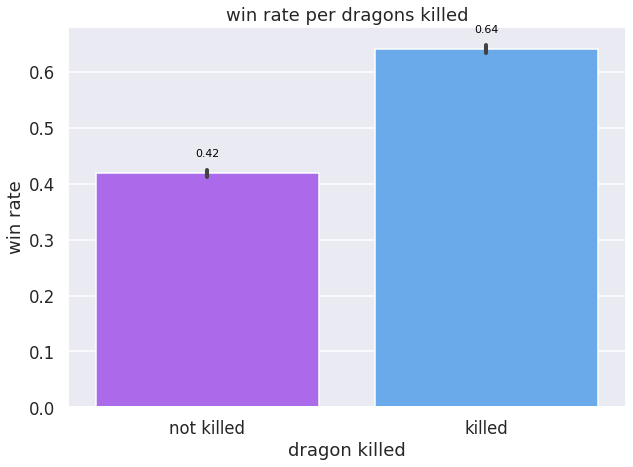

In [50]:
#create bar plot of mean number of dragons killed for losses and wins
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df_viz, x='blueDragons', y='blueWins', palette='cool_r', ax=ax, ci=68)
ax.set_title('win rate per dragons killed')
ax.set_xlabel('dragon killed')
ax.set_ylabel('win rate')
ax.set_xticklabels(['not killed','killed'])



for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0,20), textcoords='offset points')


In [51]:
#calc percent of games won for each herald kills per game
#calc total matches for herakd killed or not
df_herald=league_df.copy()
df_herald_total= df_herald.groupby('blueHeralds').count()
df_herald_total= df_herald_total[['blueWins']]
#calc number of won matches for each kill count
df_herald_won= df_herald.groupby('blueHeralds').sum()
df_herald_percent_won= df_herald_won['blueWins']/df_herald_total['blueWins']
#display percent of wins per kill count
df_herald_percent_won

blueHeralds
0    0.476814
1    0.595046
Name: blueWins, dtype: float64

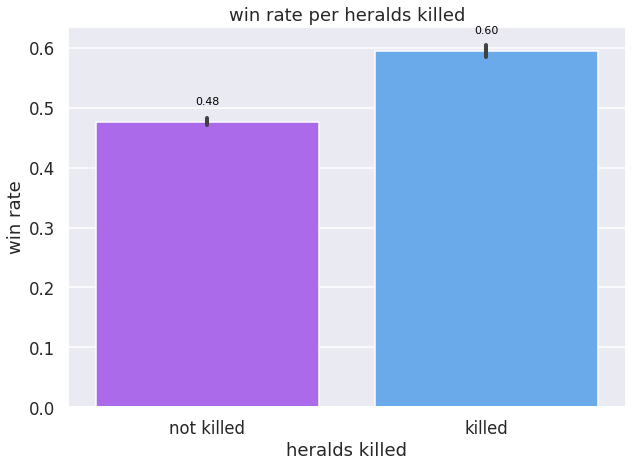

In [52]:
#create bar plot of mean number of herald killed for losses and wins
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=df_viz, x='blueHeralds', y='blueWins', palette='cool_r', ax=ax, ci=68)
ax.set_title('win rate per heralds killed')
ax.set_xlabel('heralds killed')
ax.set_ylabel('win rate')
ax.set_xticklabels(['not killed','killed'])



for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0,20), textcoords='offset points')


In [53]:
df_league.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.361980,0.187974,0.051422,216.699565,50.509667,22.367952,2.723150,6.662112,0.413098,0.160036,0.043021,217.349226,51.313088
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.480597,0.390712,0.244369,21.858437,9.898282,18.457427,2.138356,4.060612,0.492415,0.366658,0.216900,21.911668,10.027885
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,4.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,202.000000,44.000000,14.000000,1.000000,4.000000,0.000000,0.000000,0.000000,203.000000,44.000000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,218.000000,50.000000,16.000000,2.000000,6.000000,0.000000,0.000000,0.000000,218.000000,51.000000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,0.000000,0.000000,232.000000,56.000000,20.000000,4.000000,9.000000,1.000000,0.000000,0.000000,233.000000,57.000000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,1.000000,1.000000,4.000000,283.000000,92.000000,276.000000,24.000000,28.000000,1.000000,1.000000,2.000000,289.000000,92.000000
